# Data Visualization

## Histograma

#### Importar dataframe

In [1]:
import pandas as pd

base = pd.read_csv('Data Visualization/Dados/trees.csv')

base.head(5)

,Girth,Height,Volume
0,8.3,70,10.3
1,8.6,65,10.3
2,8.8,63,10.2
3,10.5,72,16.4
4,10.7,81,18.8


#### Criar histograma

In [2]:
import numpy as np

histogram = np.histogram(base.iloc[:, 1],
                         bins = 'auto') # quantidade de intervalos

print('Volume/Intervalos\n\n', histogram)

Volume/Intervalos

 (array([4, 2, 5, 7, 9, 4]), array([63., 67., 71., 75., 79., 83., 87.]))


#### Plotar histograma

(array([4., 2., 5., 7., 9., 4.]),
 array([63., 67., 71., 75., 79., 83., 87.]),
 <a list of 6 Patch objects>)

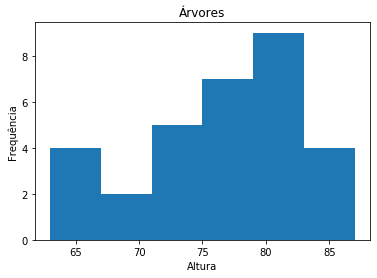

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.title('Árvores')
plt.ylabel('Frequência')
plt.xlabel('Altura')
plt.hist(base.iloc[:, 1], bins = 'auto')
# plt.show()

## Densidade

#### Plotar gráfico com atributos

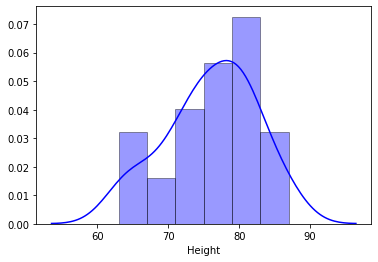

In [4]:
import seaborn as sns

sns.distplot(base.iloc[:, 1],
             hist = True, # False oculta o histograma
             kde = True, # False oculta a linha de densidade
             bins = 'auto',
             color = 'blue',
             hist_kws = {'edgecolor': 'black'}) # pintar bordas

## Histograma e densidade

Text(0.5, 1.0, 'Árvores')

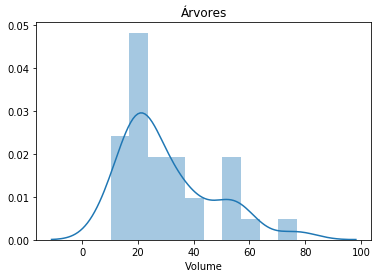

In [5]:
sns.distplot(base.Volume,
             bins = 10,
             axlabel = 'Volume').set_title('Árvores')

#### Importar dataframe

In [6]:
base_c = pd.read_csv('Data Visualization/Dados/chicken.csv')

base_c.head(5)

,weight,feed
0,179,horsebean
1,160,horsebean
2,136,horsebean
3,227,horsebean
4,217,horsebean


#### Agrupar dados

In [7]:
group = base_c.groupby(['feed'])['weight'].sum()

display(group)

feed
casein       3883
horsebean    1602
linseed      2625
meatmeal     3046
soybean      3450
sunflower    3947
Name: weight, dtype: int64

#### Plotar multiplos histogramas

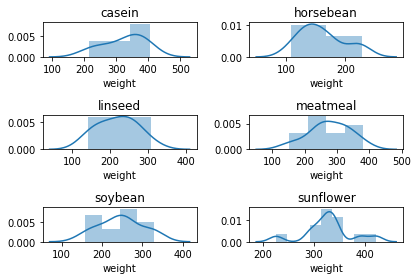

In [8]:
plt.figure()

for i, feed in enumerate(group.index):
    plt.subplot(3, 2, i + 1)
    sns.distplot(base_c[base_c['feed'] == feed].weight).set_title(feed)
    
plt.tight_layout()

## Dispersão

#### Plotar gráfico com atributos

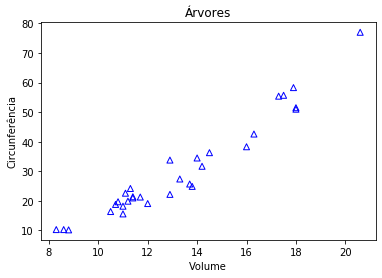

In [9]:
plt.title('Árvores')
plt.ylabel('Circunferência')
plt.xlabel('Volume')
plt.scatter(base.Girth, base.Volume,
            color = 'blue',
            facecolors = 'none', # remove o preenchimento dos pontos
            marker = '^') # alterar marcador

#### Plotar gráfico evitando a sobreposição de pontos

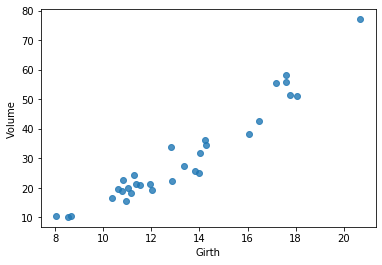

In [10]:
sns.regplot(base.Girth, base.Volume,
            data = base,
            x_jitter = 0.3, # define o ruído em x para evitar a sobreposição de pontos
            fit_reg = False) # remove a linha de regressão

#### Importar dataframe

In [11]:
base_n = pd.read_csv('Data Visualization/Dados/co2.csv')

base_n.head(5)

,Plant,Type,Treatment,conc,uptake
0,Qn1,Quebec,nonchilled,95,16.0
1,Qn1,Quebec,nonchilled,175,30.4
2,Qn1,Quebec,nonchilled,250,34.8
3,Qn1,Quebec,nonchilled,350,37.2
4,Qn1,Quebec,nonchilled,500,35.3


#### Plotar com legendas

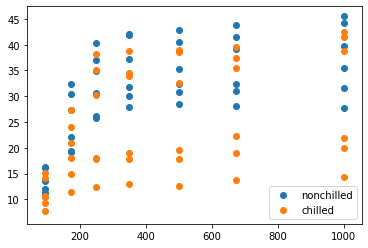

In [12]:
x = base_n.conc
y = base_n.uptake

for s in list(set(base_n.Treatment)):
    index = base_n.Treatment == s
    plt.scatter(x[index], y[index], label = s)

plt.legend(loc = 'lower right')

#### Plotar multiplos gráficos de dispersão

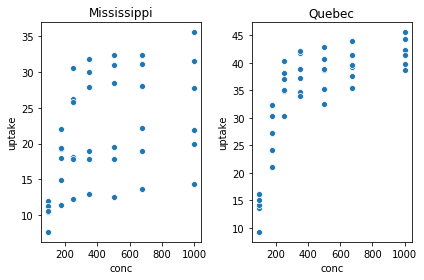

In [13]:
plt.figure()

for i, type in enumerate(np.unique(base_n.Type)):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(base_n[base_n.Type == type].conc, base_n[base_n.Type == type].uptake).set_title(type)

plt.tight_layout()

#### Importar dataframe

In [14]:
base_e = pd.read_csv('Data Visualization/Dados/esoph.csv')

display(base_e.head(5))

,agegp,alcgp,tobgp,ncases,ncontrols
0,25-34,0-39g/day,0-9g/day,0,40
1,25-34,0-39g/day,10-19,0,10
2,25-34,0-39g/day,20-29,0,6
3,25-34,0-39g/day,30+,0,5
4,25-34,40-79,0-9g/day,0,27


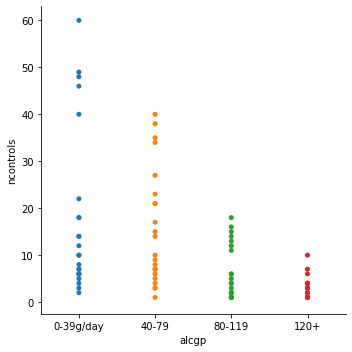

In [15]:
sns.catplot(x = 'alcgp', y = 'ncontrols', data = base_e,
            jitter = False) # define o ruído para evitar a dispersão de pontos sobrepondo em alguns casos

#### Plotar gráfico de dispersão de comparação de variáveis categóricas e contínuas

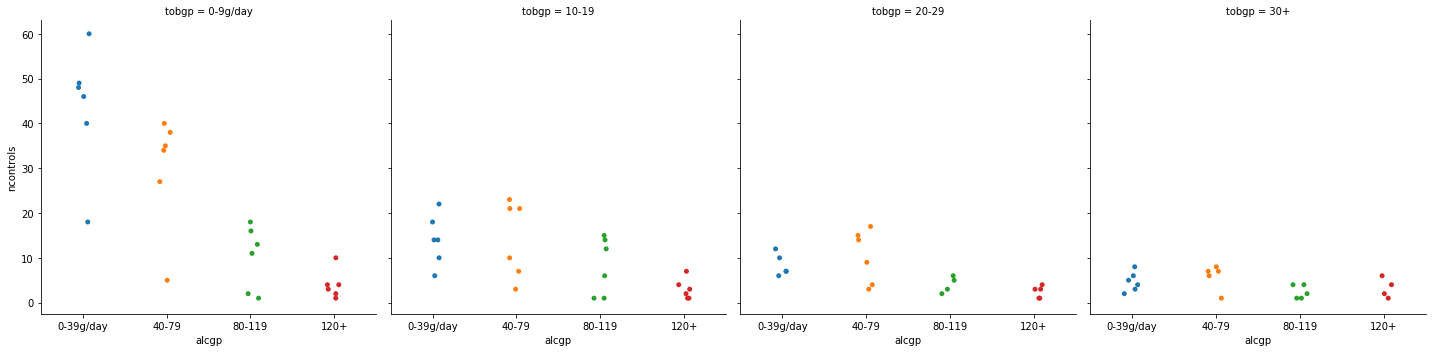

In [16]:
sns.catplot(x = 'alcgp', y = 'ncontrols', data = base_e,
            col = 'tobgp')

## Dividindo a tela

#### Plotar multiplos gráficos na mesma imagem

(array([ 5., 10.,  4.,  4.,  2.,  0.,  4.,  1.,  0.,  1.]),
 array([10.2 , 16.88, 23.56, 30.24, 36.92, 43.6 , 50.28, 56.96, 63.64,
        70.32, 77.  ]),
 <a list of 10 Patch objects>)

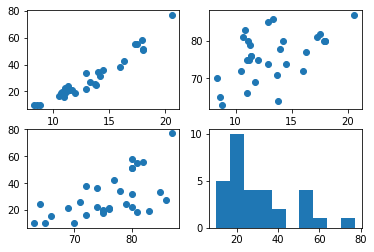

In [17]:
plt.figure(1) # 1 para o id da figura

# Girth & Volume
plt.subplot(2, 2, 1) # (rows, columns, position)
plt.scatter(base.Girth, base.Volume)

# Girth & Height
plt.subplot(2, 2, 2)
plt.scatter(base.Girth, base.Height)

# Height & Volume
plt.subplot(2, 2, 3)
plt.scatter(base.Height, base.Volume)

# volume histogram
plt.subplot(2, 2, 4)
plt.hist(base.Volume)

## Boxplot

### Matplotlib

#### Plotar gráfico com atributos

{'whiskers': [<matplotlib.lines.Line2D at 0x121bbda90>,
 'caps': [<matplotlib.lines.Line2D at 0x121bbdf28>,
 'boxes': [<matplotlib.patches.PathPatch at 0x121bbd860>],
 'medians': [<matplotlib.lines.Line2D at 0x121aff860>],
 'fliers': [],
 'means': []}

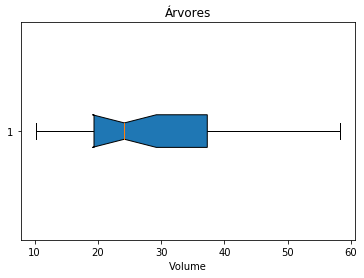

In [18]:
plt.title('Árvores')
plt.xlabel('Volume')
plt.boxplot(base.Volume,
            vert = False, # altera a visualização para a horizontal
            showfliers = False, # remove outliers
            notch = True, # destaca a mediana
            patch_artist = True) # colore o gráfico

### Seaborn

#### Plotar gráfico

Text(0.5, 1.0, 'Árvores')

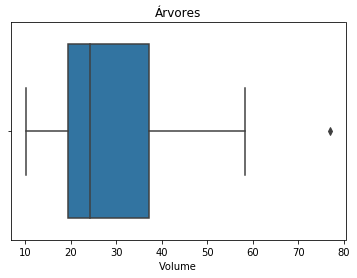

In [19]:
sns.boxplot(base.Volume).set_title('Árvores')

#### Plotar todo dataframe

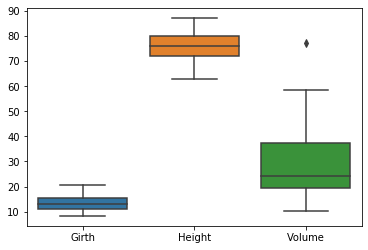

In [20]:
sns.boxplot(data = base)

## Gráficos de barras e de setores

#### Importar dataframe

In [21]:
base_i = pd.read_csv('Data Visualization/Dados/insect.csv')

base_i.head(5)

,count,spray
0,10,A
1,7,A
2,20,A
3,14,A
4,14,A


#### Agrupar dados

In [22]:
group = base_i.groupby(['spray'])['count'].sum()

display(group)

spray
A    174
B    184
C     25
D     59
E     42
F    200
Name: count, dtype: int64

#### Plotar agrupamento em barras

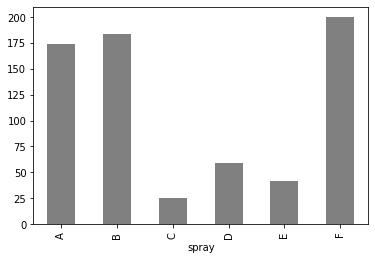

In [23]:
group.plot.bar(color = 'gray')

#### Plotar agrupamento em setores

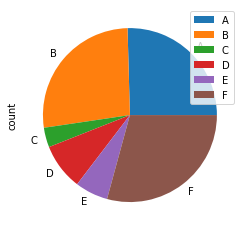

In [24]:
group.plot.pie(legend = True)

## Gráfico 3D

#### Importar dataframe

In [25]:
base_o = pd.read_csv('Data Visualization/Dados/orchard.csv')

display(base_o.head(5))

,decrease,rowpos,colpos,treatment
0,57,1,1,D
1,95,2,1,E
2,8,3,1,B
3,69,4,1,H
4,92,5,1,G


#### Atualizar pacote

In [26]:
! pip install --upgrade numpy
! pip install --upgrade matplotlib==3.1.0 # downgrade because seaborn heatmap broken on 3.1.1 version

Requirement already up-to-date: numpy in /Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages (1.17.3)
Requirement already up-to-date: matplotlib==3.1.0 in /Users/igorjuliopimenta/anaconda3/lib/python3.7/site-packages (3.1.0)


#### Plotar gráfico

Text(0.5, 0, 'colpos')

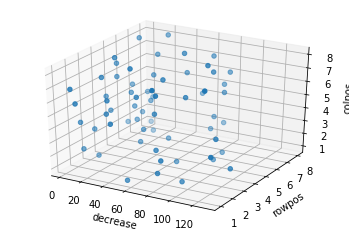

In [27]:
# from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits import mplot3d

figure = plt.figure()
axis = figure.add_subplot(1, 1, 1, projection = '3d')
axis.scatter(base_o.decrease, base_o.rowpos, base_o.colpos)
axis.set_xlabel('decrease')
axis.set_ylabel('rowpos')
axis.set_zlabel('colpos')